In [5]:
import json
# read runtimes from JSON file
with open('z_desktop_final_times.json', 'r') as f:
    final_desktop = json.load(f)

with open('z_laptop_final_times.json', 'r') as f:
    final_laptop = json.load(f)

with open('z_desktop_times.json', 'r') as f:
    times_desktop = json.load(f)

with open('z_laptop_times.json', 'r') as f:
    times_laptop = json.load(f)

with open('z_desktop_total_times.json', 'r') as f:
    total_times_desktop = json.load(f)

with open('z_laptop_total_times.json', 'r') as f:
    total_times_laptop = json.load(f)

In [8]:
final_desktop

{'ECBase_True': 47.74854673997034,
 'ECBase_False': 21.769035080005416,
 'EC_True': 50.44026397999842,
 'EC_False': 22.74793633997906,
 'ECM_True': 0.9455090799834579,
 'ECM_False': 0.42887159998062996,
 'ECMP_True': 0.6165197999915109,
 'ECMP_False': 0.3943918999750167,
 'ECBF_True': 0.882812840002589,
 'ECBF_False': 0.7857548400061205,
 'ECBFP_True': 1.4390491799917071,
 'ECBFP_False': 1.282580400002189}

In [79]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=[
    "#4477AA", "#EE6677", "#228833", "#CCBB44",
    "#66CCEE", "#AA3377", "#BBBBBB", "#000000",
    "#AA4499", "#44AA99", "#999933", "#882255"
])

versions = ['ECM_True', 'ECM_False', 'ECMP_True', 'ECMP_False', 'ECBF_True', 'ECBF_False', 'ECBFP_True', 'ECBFP_False', 'ECBase_True', 'ECBase_False', 'EC_True', 'EC_False']
labels = [f"{version.split("_")[0] if not version.startswith('ECBF') else ''.join(version.split("_")[0].split('F'))} {'grad' if version.split("_")[1] == "True" else "N-R"}" for version in versions]
labels_alt = [f"{version.split("_")[0] if not version.startswith('ECBF') else ''.join(version.split("_")[0].split('F'))} {'grad' if version.split("_")[1] == "True" else "N-R"}" for version in versions if not version.startswith('ECBase_') and not version.startswith('EC_')]
labels_alt

['ECM grad',
 'ECM N-R',
 'ECMP grad',
 'ECMP N-R',
 'ECB grad',
 'ECB N-R',
 'ECBP grad',
 'ECBP N-R']

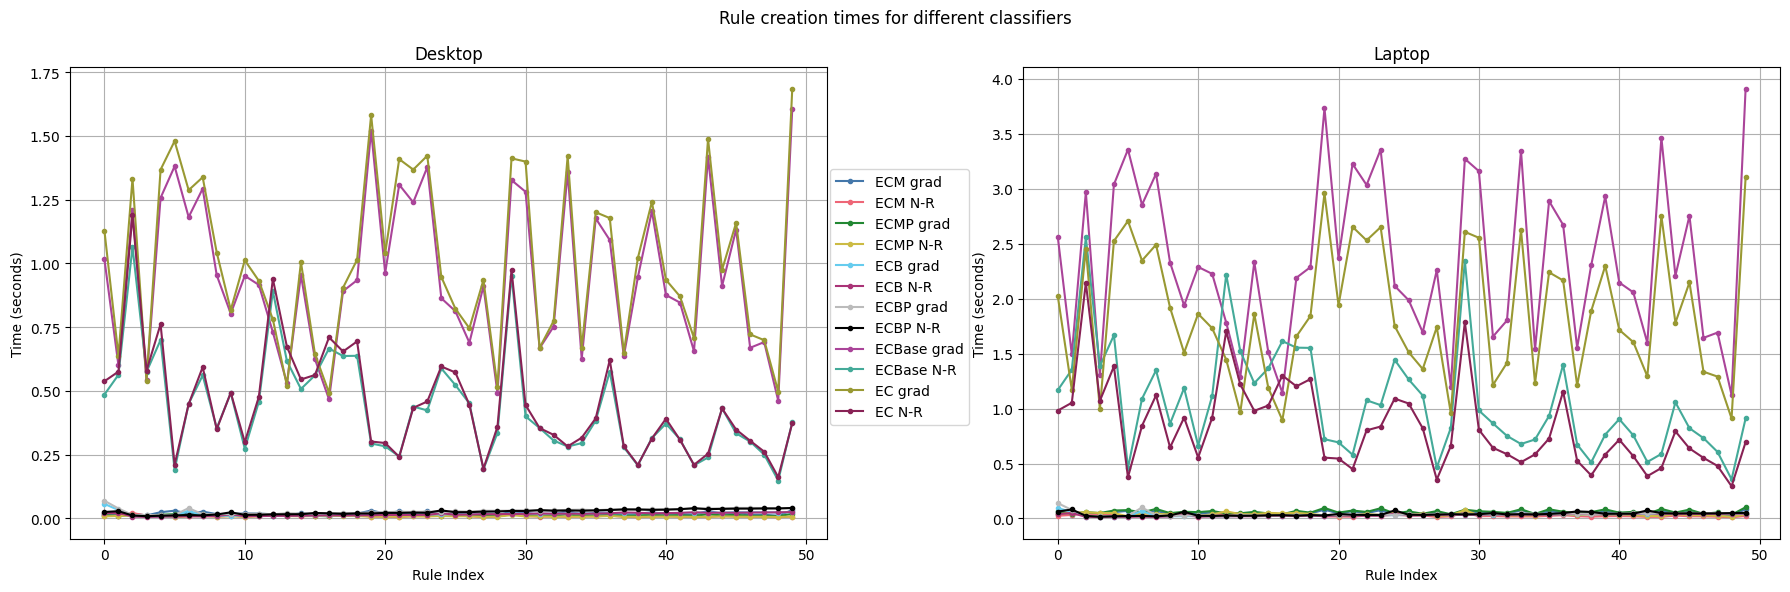

In [80]:
fig, ax = plt.subplots(1,2, figsize=(18,6))
for i, version in enumerate(versions):
    ax[0].plot(times_desktop[version], label=labels[i], marker=".")
    ax[1].plot(times_laptop[version], label=labels[i], marker=".")
ax[0].set_title('Desktop')
ax[1].set_title('Laptop')
fig.suptitle('Rule creation times for different classifiers')
for a in ax:
    a.set_xlabel('Rule Index')
    a.set_ylabel('Time (seconds)')
    a.grid()
fig.legend(handles=ax[0].lines, labels=labels, loc="center", bbox_to_anchor=(0.5025, 0.5), bbox_transform=fig.transFigure)
fig.tight_layout()
plt.subplots_adjust(wspace=0.26)
plt.show()

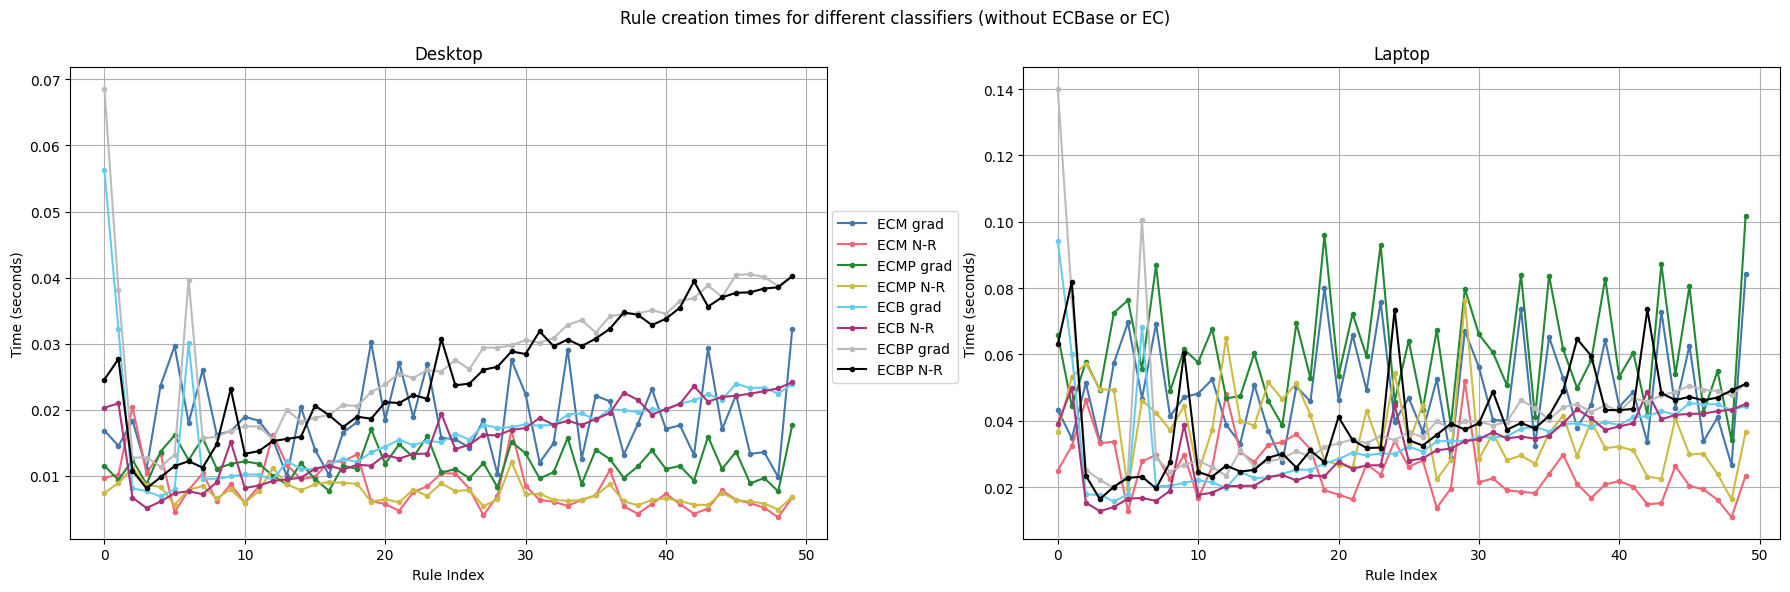

In [81]:
fig, ax = plt.subplots(1,2, figsize=(18,6))
for i, version in enumerate(versions):
    if version.startswith('ECBase_') or version.startswith('EC_'):
        continue
    ax[0].plot(times_desktop[version], label=labels[i], marker=".")
    ax[1].plot(times_laptop[version], label=labels[i], marker=".")
ax[0].set_title('Desktop')
ax[1].set_title('Laptop')
fig.suptitle('Rule creation times for different classifiers (without ECBase or EC)')
for a in ax:
    a.set_xlabel('Rule Index')
    a.set_ylabel('Time (seconds)')
    a.grid()
fig.legend(handles=ax[0].lines, labels=labels_alt, loc="center", bbox_to_anchor=(0.5, 0.5), bbox_transform=fig.transFigure)
fig.tight_layout()
plt.subplots_adjust(wspace=0.26)
plt.show()

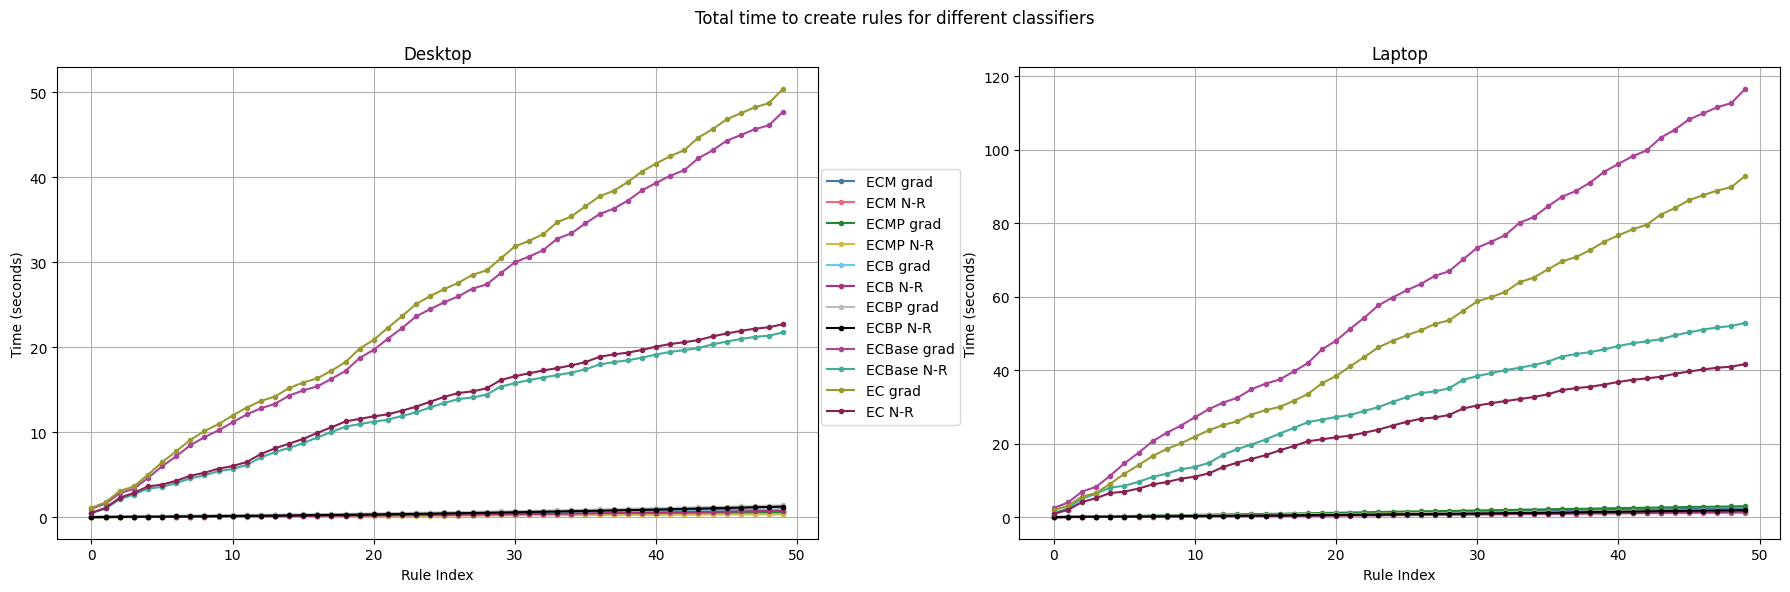

In [82]:
fig, ax = plt.subplots(1,2, figsize=(18,6))
for i, version in enumerate(versions):
    ax[0].plot(total_times_desktop[version], label=labels[i], marker=".")
    ax[1].plot(total_times_laptop[version], label=labels[i], marker=".")
ax[0].set_title('Desktop')
ax[1].set_title('Laptop')
fig.suptitle('Total time to create rules for different classifiers')
for a in ax:
    a.set_xlabel('Rule Index')
    a.set_ylabel('Time (seconds)')
    a.grid()
fig.legend(handles=ax[0].lines, labels=labels, loc="center", bbox_to_anchor=(0.4975, 0.5), bbox_transform=fig.transFigure)
fig.tight_layout()
plt.subplots_adjust(wspace=0.265)
plt.show()

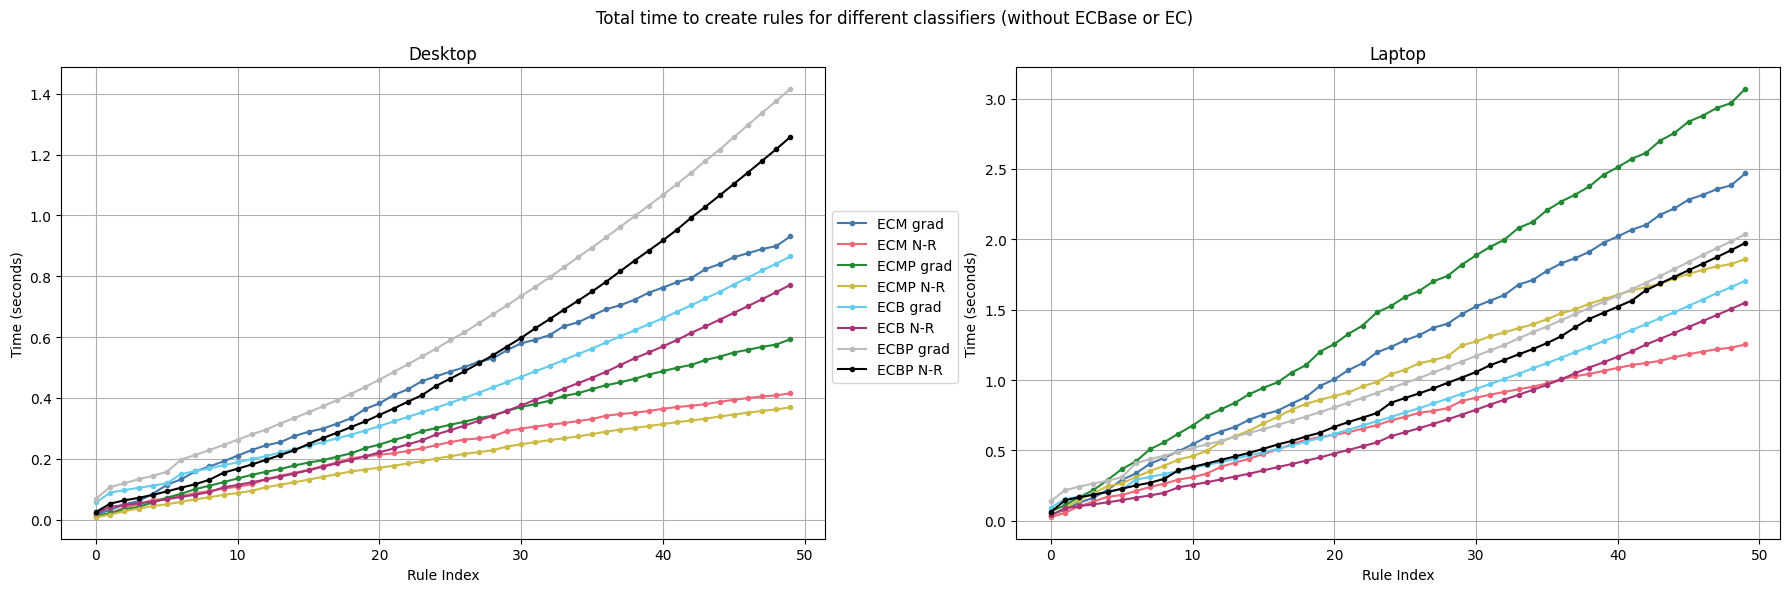

In [83]:
fig, ax = plt.subplots(1,2, figsize=(18,6))
for i, version in enumerate(versions):
    if version.startswith('ECBase_') or version.startswith('EC_'):
        continue
    ax[0].plot(total_times_desktop[version], label=labels[i], marker=".")
    ax[1].plot(total_times_laptop[version], label=labels[i], marker=".")
ax[0].set_title('Desktop')
ax[1].set_title('Laptop')
fig.suptitle('Total time to create rules for different classifiers (without ECBase or EC)')
for a in ax:
    a.set_xlabel('Rule Index')
    a.set_ylabel('Time (seconds)')
    a.grid()
fig.legend(handles=ax[0].lines, labels=labels_alt, loc="center", bbox_to_anchor=(0.5, 0.5), bbox_transform=fig.transFigure)
fig.tight_layout()
plt.subplots_adjust(wspace=0.25)
plt.show()

In [84]:
ecm_true_rule_lengths = [16, 9, 16, 13, 22, 23, 16, 27, 13, 21, 18, 23, 13, 15, 17, 12, 9, 22, 18, 34, 15, 19, 17, 33, 11, 22, 14, 23, 11, 23, 18, 21, 15, 28, 11, 27, 17, 14, 15, 26, 17, 20, 12, 25, 14, 26, 10, 18, 9, 32]
ecm_false_rule_lengths = [8, 15, 15, 17, 11, 3, 14, 12, 11, 15, 5, 12, 20, 12, 11, 16, 13, 16, 12, 8, 7, 6, 12, 8, 15, 9, 15, 4, 7, 27, 7, 11, 8, 9, 6, 9, 11, 8, 6, 10, 8, 9, 6, 5, 12, 8, 9, 6, 2, 11]
ecb_true_rule_lengths = [16, 9, 1, 1, 1, 1, 18, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
ecb_false_rule_lengths = [8, 15, 1, 1, 1, 2, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1]

In [92]:
print("Sum of rule lengths == the number of times attribute search loop executed")
print(sum(ecm_true_rule_lengths)/50.0, sum(ecm_false_rule_lengths)/50.0, sum(ecb_true_rule_lengths)/50.0, sum(ecb_false_rule_lengths)/50.0)

Sum of rule lengths == the number of times attribute search loop executed
18.4 10.34 1.8 2.1


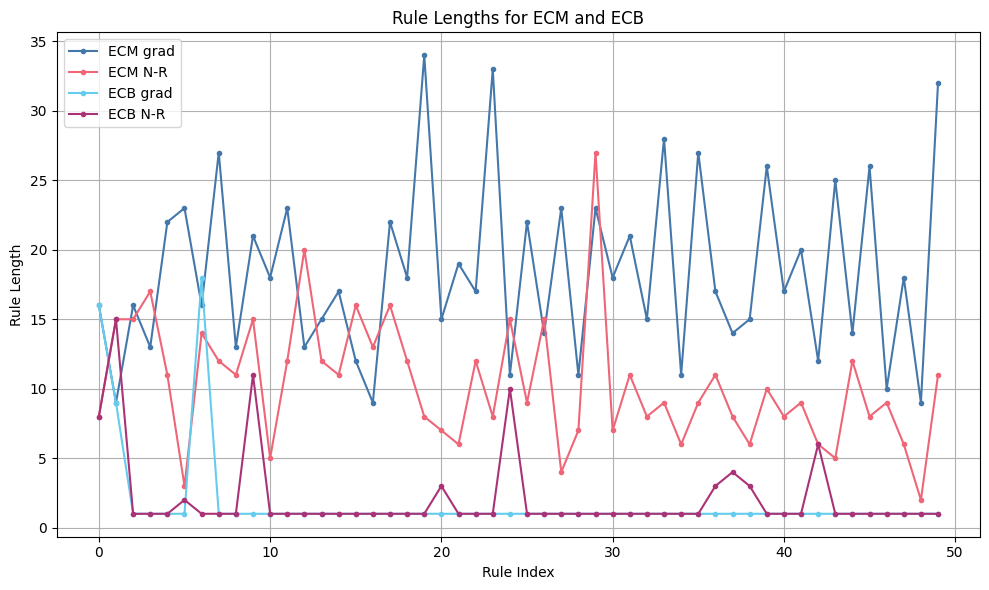

In [87]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(ecm_true_rule_lengths, label='ECM grad', color="#4477AA", marker=".")
ax.plot(ecm_false_rule_lengths, label='ECM N-R', color="#EE6677", marker=".")
ax.plot(ecb_true_rule_lengths, label='ECB grad', color="#66CCEE", marker=".")
ax.plot(ecb_false_rule_lengths, label='ECB N-R', color="#AA3377", marker=".")
ax.set_title("Rule Lengths for ECM and ECB")
ax.legend()
ax.set_xlabel('Rule Index')
ax.set_ylabel('Rule Length')
ax.grid()
fig.tight_layout()

In [88]:
ecm_true_examples_covered = [525, 349, 587, 103, 471, 398, 576, 199, 543, 142, 293, 171, 297, 75, 244, 185, 193, 116, 338, 224, 362, 384, 578, 159, 490, 117, 299, 169, 178, 322, 433, 66, 224, 260, 307, 139, 307, 131, 371, 187, 288, 164, 342, 291, 243, 157, 352, 114, 224, 208]
ecm_false_examples_covered =[314, 76, 373, 71, 249, 133, 40, 145, 18, 47, 152, 83, 91, 206, 154, 50, 132, 69, 167, 49, 74, 14, 33, 120, 44, 230, 26, 5, 87, 61, 167, 20, 73, 11, 92, 32, 179, 31, 5, 15, 108, 16, 5, 54, 32, 66, 21, 60, 85, 32]
ecbf_true_examples_covered = [525, 349, 766, 692, 413, 610, 108, 706, 660, 692, 678, 550, 260, 766, 433, 430, 442, 577, 447, 591, 716, 807, 660, 699, 608, 766, 557, 807, 752, 706, 756, 624, 627, 786, 801, 550, 752, 699, 539, 563, 440, 648, 627, 713, 516, 807, 716, 624, 346, 445]
ecbf_false_examples_covered = [314, 76, 610, 104, 247, 75, 457, 164, 550, 17, 165, 154, 246, 243, 165, 440, 437, 53, 210, 63, 4, 170, 260, 118, 14, 114, 104, 354, 320, 461, 440, 705, 425, 423, 176, 262, 4, 5, 7, 39, 157, 192, 5, 122, 242, 160, 113, 75, 48, 243]

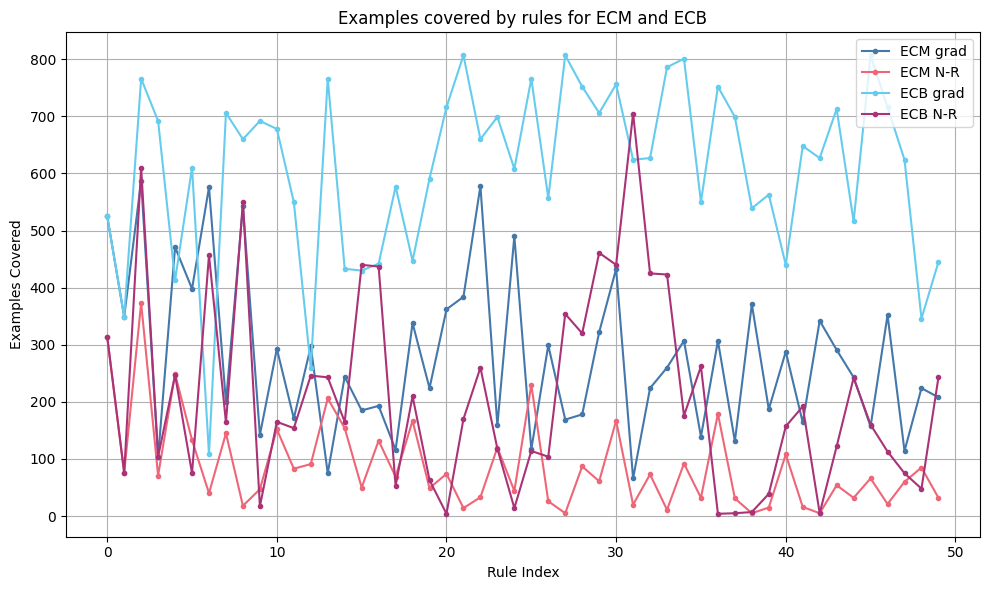

In [90]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(ecm_true_examples_covered, label='ECM grad', color="#4477AA", marker=".")
ax.plot(ecm_false_examples_covered, label='ECM N-R', color="#EE6677", marker=".")
ax.plot(ecbf_true_examples_covered, label='ECB grad', color="#66CCEE", marker=".")
ax.plot(ecbf_false_examples_covered, label='ECB N-R', color="#AA3377", marker=".")
ax.set_title("Examples covered by rules for ECM and ECB")
ax.legend()
ax.set_xlabel('Rule Index')
ax.set_ylabel('Examples Covered')
ax.grid()
fig.tight_layout()